***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 10/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [1]:
from main_new import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fithange
fit = Fitting('KMC_NonDynamic_Data_iCovg_iRates.csv','Atomic.csv','Stoich.csv','Param.csv',Input_Type='iCovg_iRates') 
fit.set_rxnconditions(Pr=[(1.0e-4*1.0e-5), (1.0e-4*0.1), 1e2]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax #Note order corresponds to stoich matrix P orders)
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

fit.MKM.Thermo_Constraint='OFF'

Mass is conserved. 

CPU times: user 17.1 ms, sys: 2.63 ms, total: 19.8 ms
Wall time: 19.7 ms


In [3]:
fit.MKM.Stoichiometric_numbers

array([[1. ],
       [0.5],
       [0.5],
       [1. ]])

In [4]:
#a = [1e-3,1e-2,1e-4,1e5,1e5,1e-2,1e3,1e4]
#Fitting for Model 1: (without CD) #using curve_fit
IKEQ = fit.MKM.Keq #From MKM model INITIAL KEQ
print('Initial Keq:',IKEQ)

Initial Keq: 6723761.3172174385


In [5]:
fit.MKM.kextract()

array([5.81e-02, 6.65e-09, 7.69e+02, 1.15e+05, 2.60e+05, 2.14e-02,
       1.35e+00, 5.00e+02])

In [6]:
fit.MKM.k

array([5.81e-02, 6.65e-09, 7.69e+02, 1.15e+05, 2.60e+05, 2.14e-02,
       1.35e+00, 5.00e+02])



The rate constants being fitted are: [2 3 4 6 7 8]
The rate constants NOT being fitted are: [1 5] 

50.0 % of the Input dataset is being extracted for fitting (i.e For each species, 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [5.81000000e-02 3.63912246e-20 1.96933757e+04 3.90693425e+05
 2.60000000e+05 2.10404233e-01 5.17560141e+00 6.45788167e-04]

 Covariance Matrix: 

[[ 6.79531130e-03  2.51775235e+00  1.25460774e+03 -4.34277438e-04
  -4.22049744e-03  2.27749378e-06]
 [ 2.51775235e+00  4.09929331e+06  1.23032368e+08 -2.26530571e+01
  -4.56926802e+00 -4.78843062e-03]
 [ 1.25460774e+03  1.23032368e+08  4.05852371e+09 -8.52436015e+02
  -3.39096951e+03  1.25766550e-01]
 [-4.34277438e-04 -2.26530571e+01 -8.52436015e+02  

<IPython.core.display.Javascript object>


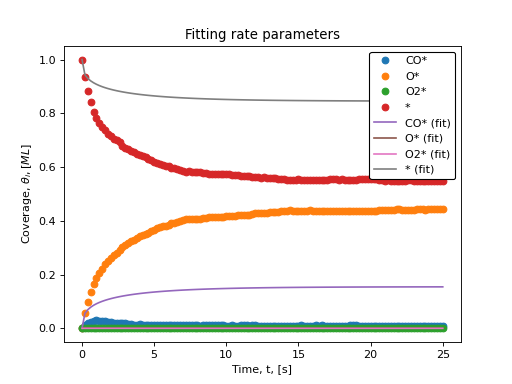

CPU times: user 16min 4s, sys: 13.6 s, total: 16min 18s
Wall time: 15min 25s


In [7]:
%%time 
#Fitting for Model 1: 
IS = fit.MKM.kextract()
t1,covg1,fits1 = fit.fitting_rate_param(IGS = IS, mask = 'ON', masking_vec=[1,5],option='cf',method_cf = 'trf', maxfev=1e6,xtol=1e-10,ftol=1e-10,plot=True) 
kfit1 = fit.fitted_k

In [7]:
fit.MKM.kextract()

array([5.81e-02, 6.65e-09, 7.69e+02, 1.15e+05, 2.60e+05, 2.14e-02,
       1.35e+00, 5.00e+02])

In [8]:
def print_check_Keq(kfit1):
    stc_numbers = fit.MKM.Stoichiometric_numbers
    Keq_k = 1
    kef = kfit1 #using fitted rate constants
    kf = kef[0::2] #Pulling out the forward rxn rate constants (::2 means every other value, skip by a step of 2)
    kr = kef[1::2] #Pulling out the reverse rxn rate constants (::2 means every other value, skip by a step of 2)

    for i in np.arange(len(kf)):
                Keq_k = Keq_k * ((kf[i]/kr[i]) ** float(stc_numbers[i]))

    print(Keq_k)
    return Keq_k

print_check_Keq(kfit1)
print('Initial Keq:',IKEQ)

1833190047017876.8
Initial Keq: 6723761.3172174385



The rate constants being fitted are: [3 4 5 6 7]
Note: The last elementary reaction step's reverse rate coefficients is implicitly being fit as a TCRC

50.0 % of the Input dataset is being extracted for fitting (i.e For each species, 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [5.81000000e-02 6.65000000e-09 4.15837484e+02 5.01201312e+12
 1.15417726e+05 8.69529906e+02 1.07341515e+00 1.46372548e-04]

 Covariance Matrix: 

[[ 3.68168663e+08  2.35580556e+03 -1.02186174e+11  4.33315984e+03
  -1.29257833e+00]
 [ 2.35580556e+03  1.89236992e-02 -8.20840423e+05  1.14306738e+02
   8.68208287e-01]
 [-1.02186174e+11 -8.20840423e+05  3.56050365e+13 -4.95820570e+09
  -3.76596811e+07]
 [ 4.33315984e+03  1.14306738e+02 -4.95820570e+0

<IPython.core.display.Javascript object>


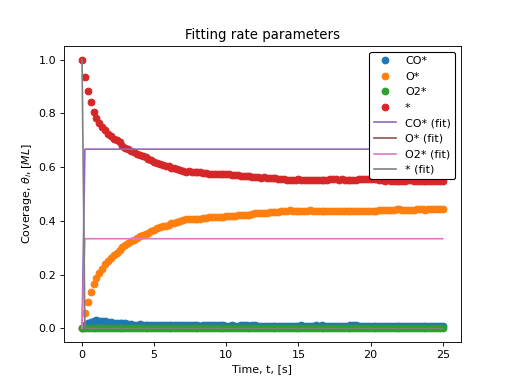

6723761.317217481
Initial Keq: 6723761.317217476
CPU times: user 3min 54s, sys: 3.73 s, total: 3min 57s
Wall time: 3min 50s


In [8]:
%%time 
#Fitting for Model 1: 
IS = fit.MKM.kextract()
t1,covg1,fits1 = fit.fitting_rate_param(IGS = IS, mask = 'ON', masking_vec=[1,2],option='cf',method_cf = 'trf', maxfev=1e6,xtol=1e-10,ftol=1e-10,plot=True) 
kfit1 = fit.fitted_k

print_check_Keq(kfit1)
print('Initial Keq:',IKEQ)


The rate constants being fitted are: [1 2 5 6 7]
Note: The last elementary reaction step's reverse rate coefficients is implicitly being fit as a TCRC

50.0 % of the Input dataset is being extracted for fitting (i.e For each species, 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [1.50607464e+01 1.43858941e+00 7.69000000e+02 1.15000000e+05
 1.16422922e+08 3.20165431e+01 8.64345042e+00 2.09860534e-03]

 Covariance Matrix: 

[[ 4.26520882e+00  2.96446361e-02 -1.39800588e+07  8.10898589e-02
  -3.14198550e+00]
 [ 2.96446361e-02  3.64871613e-02 -1.79002715e+05  2.08390161e-02
   2.21633275e-01]
 [-1.39800588e+07 -1.79002715e+05  1.04531006e+14  9.76923249e+06
   5.73769467e+06]
 [ 8.10898589e-02  2.08390161e-02  9.76923249e+0

<IPython.core.display.Javascript object>


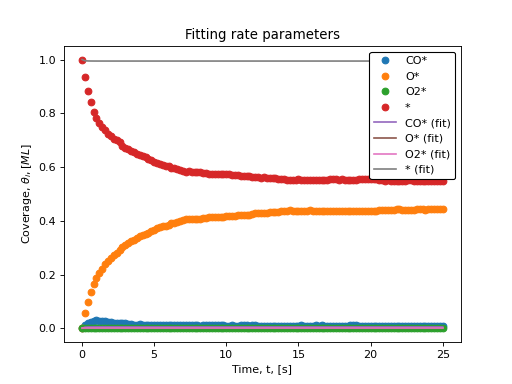

6723761.317217479
Initial Keq: 6723761.317217476
CPU times: user 19min 7s, sys: 24.4 s, total: 19min 31s
Wall time: 18min 37s


In [9]:
%%time 
#Fitting for Model 1: 
IS = fit.MKM.kextract()
t1,covg1,fits1 = fit.fitting_rate_param(IGS = IS, mask = 'ON', masking_vec=[3,4],option='cf',method_cf = 'trf', maxfev=1e6,xtol=1e-10,ftol=1e-10,plot=True) 
kfit1 = fit.fitted_k

print_check_Keq(kfit1)
print('Initial Keq:',IKEQ)


The rate constants being fitted are: [1 2 3 4 7]
Note: The last elementary reaction step's reverse rate coefficients is implicitly being fit as a TCRC

50.0 % of the Input dataset is being extracted for fitting (i.e For each species, 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [5.81000000e-02 2.82011600e-08 7.69000000e+02 1.15000000e+05
 2.60000000e+05 2.14000000e-02 1.35000000e+00 1.17902951e+02]

 Covariance Matrix: 

[[ 2.70581878e+06  2.02112084e+00  1.02618093e+02 -9.56037055e-01
   4.31294846e+05]
 [ 2.02112084e+00  1.50968331e-06  7.66509446e-05 -7.14115236e-07
   3.22157200e-01]
 [ 1.02618093e+02  7.66509446e-05  3.89178795e-03 -3.62576754e-05
   1.63568436e+01]
 [-9.56037055e-01 -7.14115236e-07 -3.62576754e-0

<IPython.core.display.Javascript object>


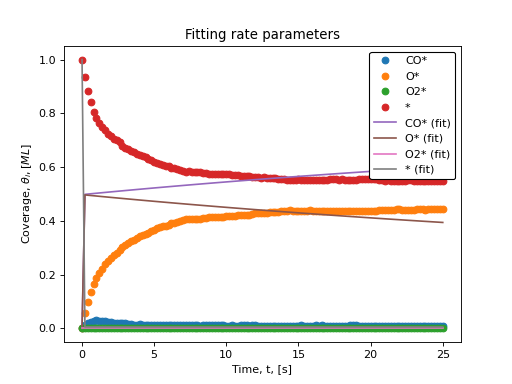

6723761.317217472
Initial Keq: 6723761.317217476
CPU times: user 54 s, sys: 714 ms, total: 54.7 s
Wall time: 53.4 s


In [10]:
%%time 
#Fitting for Model 1: 
IS = fit.MKM.kextract()
t1,covg1,fits1 = fit.fitting_rate_param(IGS = IS, mask = 'ON', masking_vec=[5,6],option='cf',method_cf = 'trf', maxfev=1e6,xtol=1e-10,ftol=1e-10,plot=True) 
kfit1 = fit.fitted_k

print_check_Keq(kfit1)
print('Initial Keq:',IKEQ)


The rate constants being fitted are: [1 2 3 4 5 6]
Note: The last elementary reaction step's reverse rate coefficients is implicitly being fit as a TCRC

50.0 % of the Input dataset is being extracted for fitting (i.e For each species, 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [5.81000000e-02 2.82011600e-08 7.69000000e+02 1.15000000e+05
 2.60000000e+05 2.14000000e-02 1.35000000e+00 1.17902951e+02]

 Covariance Matrix: 

[[ 3.08262087e+06  2.28179251e+00  1.16435284e+02 -7.69348495e-01
   3.40251115e-01  5.05842668e+03]
 [ 2.28179251e+00  1.68911220e-06  8.61867777e-05 -5.69481104e-07
   2.51858009e-07  3.64268381e-03]
 [ 1.16435284e+02  8.61867777e-05  4.39793796e-03 -2.90594641e-05
   1.28518027e-05  1.91064151e-01

<IPython.core.display.Javascript object>


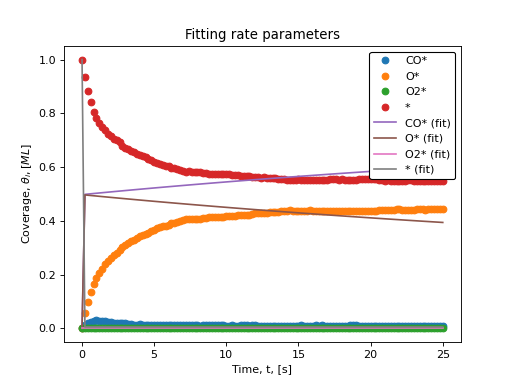

6723761.317217473
Initial Keq: 6723761.317217476
CPU times: user 1min 1s, sys: 728 ms, total: 1min 2s
Wall time: 1min


In [11]:
%%time 
#Fitting for Model 1: 
IS = fit.MKM.kextract()
t1,covg1,fits1 = fit.fitting_rate_param(IGS = IS, mask = 'ON', masking_vec=[7],option='cf',method_cf = 'trf', maxfev=1e6,xtol=1e-10,ftol=1e-10,plot=True) 
kfit1 = fit.fitted_k

print_check_Keq(kfit1)
print('Initial Keq:',IKEQ)

In [10]:
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(Ti=0,Tf=25)#Sets the reange of time used in integration

(0, 25)

In [11]:
MKM1.k = kfit1

<IPython.core.display.Javascript object>


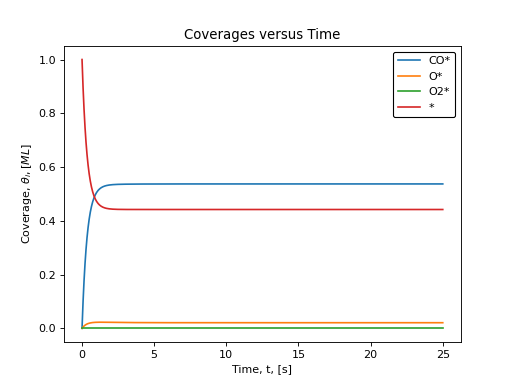

In [12]:
a, b = MKM1.solve_coverage(plot=True)

In [4]:
fit.MKM.k

array([5.81e-02, 6.65e-09, 7.69e+02, 1.15e+05, 2.60e+05, 2.14e-02,
       1.35e+00, 5.00e+02])

In [120]:
kfit1

array([8.06034819e+07, 2.48306346e+05, 2.11068408e+04, 1.07468138e+05,
       1.06395179e+05, 2.05136975e-01, 1.78453698e+06, 2.74972969e+04])

In [86]:
indexes = [1,3,5,7]
import numpy as np
import numpy.ma as ma
y = ma.array([1, 2, 3], mask = [0, 1, 1])
ma.getdata(y)
a = [1,3,6,7,78,8,9]
kfit1[~(5)]
# y.compressed()

21106.8408144477

In [127]:
indexes = [1,4]
indexes = [x - 1 for x in indexes]
arr = np.arange(8)
arr = np.array([x + 1 for x in arr])
mask = np.ones(arr.size, dtype=bool)
mask[indexes] = False
result = arr[mask]
result

array([2, 3, 5, 6, 7, 8])

In [112]:
indexes=[3,4,6,5,6,5,4,4]
list2 = np.arange(8)
list2 = [x + 1 for x in list2]
print(indexes)
print(list2)
for value in indexes:
    if value not in list2:
        check = False
    else:
        check= True
        
print(check)        

[3, 4, 6, 5, 6, 5, 4, 4]
[1, 2, 3, 4, 5, 6, 7, 8]
True


50.0 % of the Input dataset is being extracted for fitting (i.e For each species, 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [8.06034819e+07 2.48306346e+05 2.11068408e+04 1.07468138e+05
 1.06395179e+05 2.05136975e-01 1.78453698e+06 2.74972969e+04]

 Covariance Matrix: 

[[ 2.59622963e+13  1.18124553e+13 -9.54898319e+07  2.03211248e+13
   2.01113215e+13 -2.95063105e+04  8.28507924e+13]
 [ 1.18124553e+13  1.28146131e+16  1.07714550e+10 -5.10544711e+15
  -5.05466306e+15 -7.32260542e+05  9.20943228e+16]
 [-9.54898319e+07  1.07714550e+10  9.65796925e+05 -1.52869320e+09
  -1.52229894e+09 -9.33885712e+00  7.74189680e+10]
 [ 2.03211248e+13 -5.10544711e+15 -1.52869320e+09  3.02598197e+15
   2.99579589e+15  1.37498334e+05 -3.66

<IPython.core.display.Javascript object>


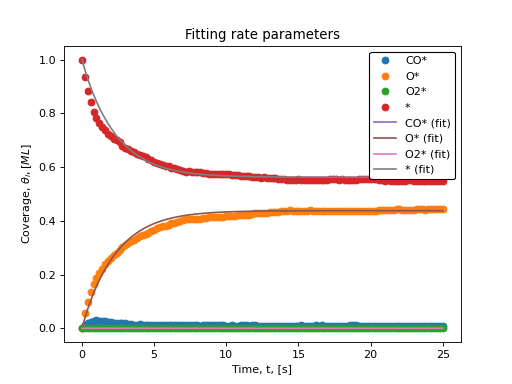

CPU times: user 6min 53s, sys: 6.21 s, total: 7min
Wall time: 6min 23s


In [5]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',method_cf = 'trf', maxfev=1e6,xtol=1e-8,ftol=1e-8,plot=True) 
kfit1 = fit.fitted_k

In [6]:
%%time
stc_numbers = fit.MKM.Stoichiometric_numbers
Keq_k = 1
kef = kfit1 #using fitted rate constants
kf = kef[0::2] #Pulling out the forward rxn rate constants (::2 means every other value, skip by a step of 2)
kr = kef[1::2] #Pulling out the reverse rxn rate constants (::2 means every other value, skip by a step of 2)

for i in np.arange(len(kf)):
            Keq_k = Keq_k * ((kf[i]/kr[i]) ** float(stc_numbers[i]))
        
print(Keq_k)

6723761.317217469
CPU times: user 819 µs, sys: 861 µs, total: 1.68 ms
Wall time: 1.77 ms


# Changing the pressure: (1e-9)

[mpf('0.0000000010000000000000000622815914577798564188970686927859788'), mpf('0.000010000000000000000818030539140313095458623138256371021'), 0.1]
[mpf('0.0000000010000000000000000622815914577798564188970686927859788'), mpf('0.000010000000000000000818030539140313095458623138256371021'), 1e-09]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [8.19735172e+03 3.01953974e-08 1.83558840e+04 1.15000001e+05
 8.82236951e+04 2.30673235e-01 8.45019956e+00 8.42985773e+07]

 Covariance Matrix: 

[[ 4.48963597e+05  2.27722278e-06 -1.33562707e+06 -5.08742111e+06
   6.63148214e+06  1.09844894e+01  1.02503473e+01]
 [ 2.27722278e-06  3.40892033e-17 -6.51289364e-06 -2.58171083e-

<IPython.core.display.Javascript object>


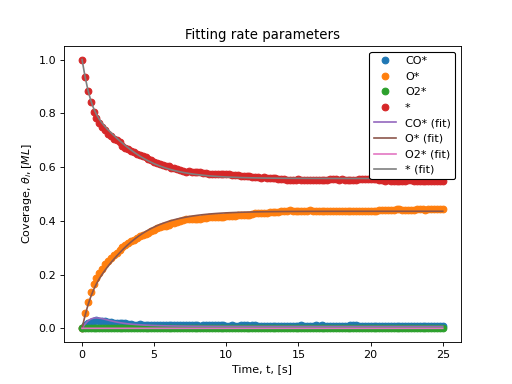

CPU times: user 5min 30s, sys: 3.84 s, total: 5min 33s
Wall time: 5min 7s


In [11]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
print(fit.P)
fit.P[-1] = 1e-9
print(fit.P)
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',method_cf = 'trf', maxfev=1e6,xtol=1e-8,ftol=1e-8,plot=True) 
kfit1 = fit.fitted_k

In [7]:
fit.MKM.Stoich

,r\S,P_CO,P_O2,P_CO2,theta_CO,theta_O,theta_O2,theta_*
0,r1,-1,0,0,1,0,0,-1
1,r2,0,-1,0,0,0,1,-1
2,r3,0,0,0,0,2,-1,-1
3,r4,0,0,1,-1,-1,0,2


In [8]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fithange
fit = Fitting('KMC_NonDynamic_Data_iCovg_iRates.csv','Atomic.csv','Stoich.csv','Param.csv',Input_Type='iCovg_iRates') 
fit.set_rxnconditions(Pr=[(6.999999999999999E-005*1.0e-5),(0.99*1.0e-5),0]) #Matches order of stoich press. of gas species#Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax #Note order corresponds to stoich matrix P orders)
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

Mass is conserved. 

Thermodynamically constrained (with pseudo Keq)
CPU times: user 31.1 ms, sys: 4.53 ms, total: 35.6 ms
Wall time: 33.6 ms


In [9]:
fit.MKM.Keq #From MKM model

6723761.317217476

# Changing the pressure: 

[mpf('0.00000000069999999999999996087905276514313200608707887795389979'), mpf('0.0000099000000000000000814018991102116729052795562893152237'), mpf('0.0')]
[mpf('0.00000000069999999999999996087905276514313200608707887795389979'), mpf('0.0000099000000000000000814018991102116729052795562893152237'), 1e-09]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [8.13670738e+03 3.06484578e-08 1.85497031e+04 1.15000002e+05
 8.83124539e+04 2.31085155e-01 8.73027511e+00 8.55855063e+07]

 Covariance Matrix: 

[[ 4.36815149e+05  2.25012661e-06 -1.33195601e+06 -5.02878899e+06
   6.54846535e+06  1.08692669e+01  8.49631725e+00]
 [ 2.25012661e-06  3.49500097e-17 -6.59940555e-06 -2

<IPython.core.display.Javascript object>


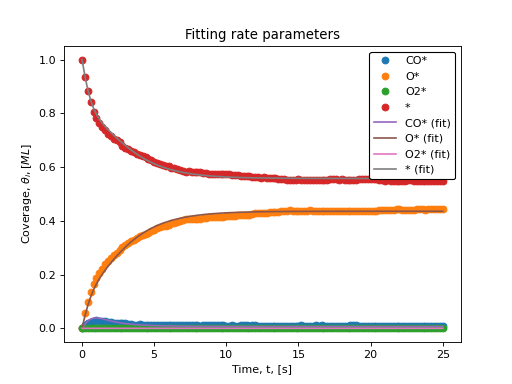

CPU times: user 5min 30s, sys: 4.2 s, total: 5min 34s
Wall time: 5min 9s


In [12]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
print(fit.P)
fit.P[-1] = 1e-9
print(fit.P)
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',method_cf = 'trf', maxfev=1e6,xtol=1e-8,ftol=1e-8,plot=True) 
kfit1 = fit.fitted_k

In [13]:
%%time
stc_numbers = fit.MKM.Stoichiometric_numbers
Keq_k = 1
kef = kfit1 #using fitted rate constants
kf = kef[0::2] #Pulling out the forward rxn rate constants (::2 means every other value, skip by a step of 2)
kr = kef[1::2] #Pulling out the reverse rxn rate constants (::2 means every other value, skip by a step of 2)

for i in np.arange(len(kf)):
            Keq_k = Keq_k * ((kf[i]/kr[i]) ** float(stc_numbers[i]))
        
print(Keq_k)

6723761.317217461
CPU times: user 493 µs, sys: 454 µs, total: 947 µs
Wall time: 623 µs


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# TRYING OUT ML K Fitting

In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_NonDynamic_Data_iCovg_iRates.csv','Atomic.csv','Stoich.csv','Param.csv',Input_Type='iCovg_iRates') 
fit.set_rxnconditions(Pr=[(1.0e-4*1.0e-5), (1.0e-4*0.1), 0]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax #Note order corresponds to stoich matrix P orders)
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

Mass is conserved. 

CPU times: user 22.4 ms, sys: 1.84 ms, total: 24.2 ms
Wall time: 26.1 ms


50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: MLPRegressor | (FeedForward) Neural Network:

Number of Hidden layer nodes per layer :  128
Number of Hidden layers:  4
The Model Mean Squared Errors: 
 [1.89315791e+04 2.84348892e+01 9.29081906e+04 9.33474776e+10
 7.14751369e+10 7.03268382e+03 1.79101207e+04 4.63469783e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)


 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [1.36478949e+02 5.30744950e+00 4.44387030e+02 5.13326594e+05
 4.82216246e+05 8.29707973e+01 1.36597667e+02 4.51542098e+02]


<IPython.core.display.Javascript object>


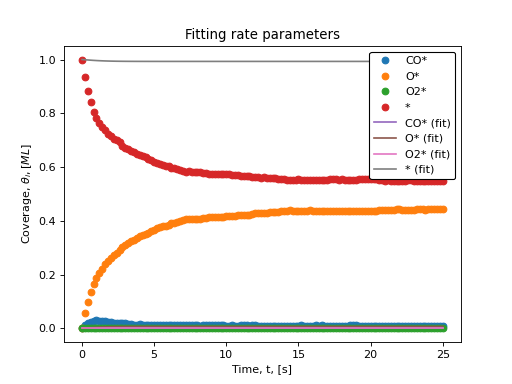

CPU times: user 9.12 s, sys: 612 ms, total: 9.74 s
Wall time: 7.14 s


In [3]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t2,covg2,fits2 = fit.fitting_rate_param(option='ML',plot=True) 
kfit2 = fit.fitted_k

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: K Nearest Neighbor Regressor:

The Model Mean Squared Errors: 
 [1.59994728e-04 6.62218291e-19 1.35164287e+04 4.17628302e+10
 4.07591491e+09 5.01980884e-05 6.26400082e-01 8.89270322e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)


 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [6.15518244e-02 6.91201442e-09 7.24535387e+02 3.69448883e+05
 4.57716988e+05 4.94153024e-02 2.65476057e+00 3.78363259e+02]


<IPython.core.display.Javascript object>


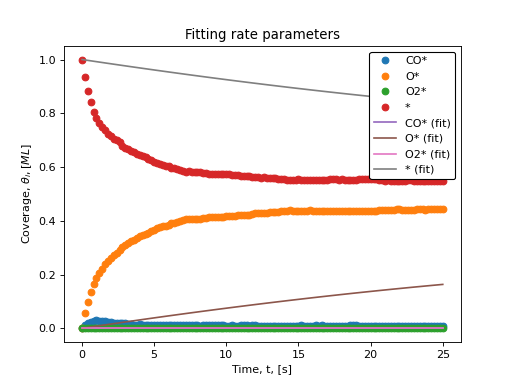

CPU times: user 6.84 s, sys: 347 ms, total: 7.19 s
Wall time: 5.99 s


In [4]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t3,covg3,fits3 = fit.fitting_rate_param(option='ML',mdl='KNeighborsRegressor',plot=True) 
kfit3 = fit.fitted_k

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: Decision Tree Regressor:

The Model Mean Squared Errors: 
 [7.50000000e-05 6.25000000e-19 7.50000000e+03 2.75000000e+10
 7.50000000e+09 6.25000000e-05 5.69444444e-01 9.23611111e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)


 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [7.33333333e-02 8.66666667e-09 7.00000000e+02 1.00000000e+05
 2.00000000e+05 3.00000000e-02 4.00000000e+00 5.33333333e+02]


<IPython.core.display.Javascript object>


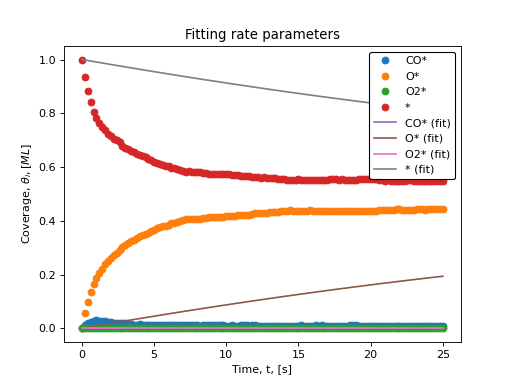

CPU times: user 5.99 s, sys: 23.9 ms, total: 6.02 s
Wall time: 6.02 s


In [5]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t4,covg4,fits4 = fit.fitting_rate_param(option='ML',mdl='DecisionTreeRegressor',plot=True) 
kfit4 = fit.fitted_k

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: Random Forest Regressor:

The Model Mean Squared Errors: 
 [1.16644679e-04 5.65744839e-19 1.06989056e+04 4.02738365e+10
 4.77621298e+09 5.92934150e-05 3.82441274e-01 7.79703792e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)


 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [7.27979606e-02 8.54799803e-09 7.03650000e+02 1.20190000e+05
 2.17640000e+05 3.01760000e-02 3.92310000e+00 5.24204417e+02]


<IPython.core.display.Javascript object>


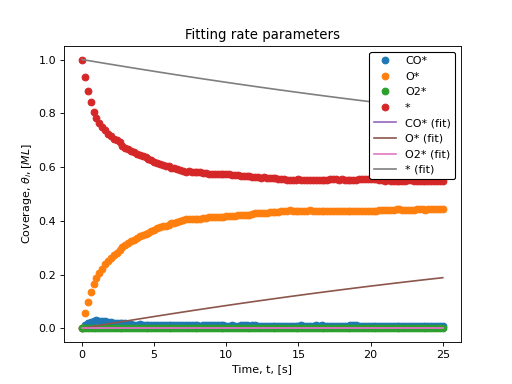

CPU times: user 50.1 s, sys: 402 ms, total: 50.5 s
Wall time: 52 s


In [3]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t5,covg5,fits5 = fit.fitting_rate_param(option='ML',mdl='RandomForestRegressor',plot=True) 
kfit5 = fit.fitted_k